In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sdv.tabular import CopulaGAN

import os, glob

In [79]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [80]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/MERGE_FT_TEP_UT_on_ID.csv'),
                    index_col=0)

In [81]:
data.index = data.index.str.rstrip('-12345')

In [89]:
mean_df = data.groupby('ID').mean()
mean_df.dropna(how='any', inplace=True)
#mean_df['Type'] = mean_df.index.str.split('-').str[0].astype('category')
#mean_df['CW'] = mean_df.index.str.split('-').str[1].astype('category')
mean_df['type_cw'] = mean_df.index.astype('str')

In [90]:
mean_df.head()

,KJIC,MS_Avg,MS_neg_error,MS_pos_error,TEP_average,TEP_error,Beta_avg,PC_IF_2.25MHz,SE_IF_2.25MHz,SE_%_IF_2.25MHz,PC_IF_3.5MHz,SE_IF_3.5MHz,SE_%_IF_3.5MHz,PC_BS,type_cw
ID,,,,,,,,,,,,,,,
304-0,162.000,0.120,0.0350,0.0860,-1.547,0.04900,0.002743,0.0,0.013,2.9,0.0,0.005,1.3,0.0,304-0
304-20,105.780,0.496,0.1770,0.2390,-1.322,0.06300,0.002093,50.0,0.014,2.0,59.0,0.006,1.1,-12.0,304-20
304-40,100.700,1.350,0.3770,0.3770,-1.216,0.05300,0.001941,57.0,0.022,3.0,79.0,0.012,1.9,-20.0,304-40
304-60,91.320,1.371,0.5310,0.9090,-1.249,0.05200,0.002567,98.0,0.010,1.1,139.0,0.015,1.7,3.0,304-60
304-80,73.775,3.966,1.3495,2.4765,-0.976,0.06425,0.002420,94.0,0.024,2.7,149.0,0.021,2.4,10.0,304-80


In [91]:
mean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 304-0 to A286-80
Data columns (total 15 columns):
KJIC               19 non-null float64
MS_Avg             19 non-null float64
MS_neg_error       19 non-null float64
MS_pos_error       19 non-null float64
TEP_average        19 non-null float64
TEP_error          19 non-null float64
Beta_avg           19 non-null float64
PC_IF_2.25MHz      19 non-null float64
SE_IF_2.25MHz      19 non-null float64
SE_%_IF_2.25MHz    19 non-null float64
PC_IF_3.5MHz       19 non-null float64
SE_IF_3.5MHz       19 non-null float64
SE_%_IF_3.5MHz     19 non-null float64
PC_BS              19 non-null float64
type_cw            19 non-null object
dtypes: float64(14), object(1)
memory usage: 2.4+ KB


# CopulaGAN

The sdv.tabular.CopulaGAN model is a variation of the CTGAN Model which takes advantage of the CDF based transformation that the GaussianCopulas apply to make the underlying CTGAN model task of learning the data easier.

# 1. Model the data

## Step 1: Prepare your data

CTGAN expects the input data to be a table given as either a numpy.ndarray or a pandas.DataFrame object with two types of columns:

- Continuous Columns: Columns that contain numerical values and which can take any value.
- Discrete columns: Columns that only contain a finite number of possible values, wether these are string values or not.


Aside from the table itself, you will need to create a **list with the names of the discrete variables.**


In [67]:
#discrete_columns = mean_df.loc[:, mean_df.dtypes == 'category'].columns.to_list()

## Step 2: Fit CTGAN to your data

In [92]:
model = CopulaGAN()
model.fit(mean_df)

/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

In [93]:
model.get_distributions()

{'KJIC': 'copulas.univariate.log_laplace.LogLaplace',
 'MS_Avg': 'copulas.univariate.beta.BetaUnivariate',
 'MS_neg_error': 'copulas.univariate.gamma.GammaUnivariate',
 'MS_pos_error': 'copulas.univariate.gamma.GammaUnivariate',
 'TEP_average': 'copulas.univariate.student_t.StudentTUnivariate',
 'TEP_error': 'copulas.univariate.log_laplace.LogLaplace',
 'Beta_avg': 'copulas.univariate.gaussian.GaussianUnivariate',
 'PC_IF_2.25MHz': 'copulas.univariate.gamma.GammaUnivariate',
 'SE_IF_2.25MHz': 'copulas.univariate.student_t.StudentTUnivariate',
 'SE_%_IF_2.25MHz': 'copulas.univariate.log_laplace.LogLaplace',
 'PC_IF_3.5MHz': 'copulas.univariate.gaussian.GaussianUnivariate',
 'SE_IF_3.5MHz': 'copulas.univariate.gamma.GammaUnivariate',
 'SE_%_IF_3.5MHz': 'copulas.univariate.log_laplace.LogLaplace',
 'PC_BS': 'copulas.univariate.truncated_gaussian.TruncatedGaussian'}

# 2. Generate synthetic data

In [94]:
samples = model.sample(100)

In [98]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
KJIC               100 non-null float64
MS_Avg             100 non-null float64
MS_neg_error       100 non-null float64
MS_pos_error       100 non-null float64
TEP_average        100 non-null float64
TEP_error          100 non-null float64
Beta_avg           100 non-null float64
PC_IF_2.25MHz      100 non-null float64
SE_IF_2.25MHz      100 non-null float64
SE_%_IF_2.25MHz    100 non-null float64
PC_IF_3.5MHz       100 non-null float64
SE_IF_3.5MHz       100 non-null float64
SE_%_IF_3.5MHz     100 non-null float64
PC_BS              100 non-null float64
type_cw            100 non-null object
dtypes: float64(14), object(1)
memory usage: 11.8+ KB


In [71]:
col = ['KJIC', 'MS_Avg', 'MS_neg_error', 'MS_pos_error', 'TEP_average',
       'TEP_error', 'Beta_avg', 'PC_IF_2.25MHz', 'SE_IF_2.25MHz',
       'SE_%_IF_2.25MHz', 'PC_IF_3.5MHz', 'SE_IF_3.5MHz',
       'SE_%_IF_3.5MHz', 'PC_BS']
samples[col] = samples[col].astype('float')
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
KJIC               1000 non-null float64
MS_Avg             1000 non-null float64
MS_neg_error       1000 non-null float64
MS_pos_error       1000 non-null float64
TEP_average        1000 non-null float64
TEP_error          1000 non-null float64
Beta_avg           1000 non-null float64
PC_IF_2.25MHz      1000 non-null float64
SE_IF_2.25MHz      1000 non-null float64
SE_%_IF_2.25MHz    1000 non-null float64
PC_IF_3.5MHz       1000 non-null float64
SE_IF_3.5MHz       1000 non-null float64
SE_%_IF_3.5MHz     1000 non-null float64
PC_BS              1000 non-null float64
type_cw            1000 non-null object
dtypes: float64(14), object(1)
memory usage: 117.3+ KB


In [76]:
mean_df.describe()

,KJIC,MS_Avg,MS_neg_error,MS_pos_error,TEP_average,TEP_error,Beta_avg,PC_IF_2.25MHz,SE_IF_2.25MHz,SE_%_IF_2.25MHz,PC_IF_3.5MHz,SE_IF_3.5MHz,SE_%_IF_3.5MHz,PC_BS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,96.482982,0.982158,0.348000,0.570039,-1.355789,0.051447,0.002364,161.157895,0.018053,2.621053,242.842105,0.016211,2.110526,-20.842105
std,43.537916,1.720298,0.628664,0.954536,0.228090,0.007534,0.000273,184.536736,0.007539,1.341052,323.192111,0.017012,2.223085,26.357085
min,47.166667,0.009250,0.002000,0.002000,-1.673750,0.044000,0.001770,0.000000,0.006000,0.800000,0.000000,0.002000,0.500000,-69.000000
25%,69.480000,0.029000,0.007500,0.013500,-1.526500,0.045125,0.002212,46.000000,0.012500,1.700000,48.000000,0.005500,1.000000,-36.500000
50%,77.800000,0.120000,0.035000,0.086000,-1.364000,0.049000,0.002420,98.000000,0.018000,2.500000,139.000000,0.012000,1.500000,-20.000000
75%,108.510000,1.180750,0.333000,0.524750,-1.247000,0.055000,0.002556,200.500000,0.023500,3.350000,248.000000,0.016500,2.100000,0.000000
max,198.500000,6.391000,2.338000,2.815000,-0.822000,0.069000,0.002785,601.000000,0.032000,5.000000,1136.000000,0.063000,9.500000,30.000000


In [101]:
samples.describe()

,KJIC,MS_Avg,MS_neg_error,MS_pos_error,TEP_average,TEP_error,Beta_avg,PC_IF_2.25MHz,SE_IF_2.25MHz,SE_%_IF_2.25MHz,PC_IF_3.5MHz,SE_IF_3.5MHz,SE_%_IF_3.5MHz,PC_BS
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,103.702706,3.202392,0.762529,0.551013,-1.521961,0.051481,0.002661,1.755718e+02,0.016117,2.758670,229.537669,0.010113,10.648167,-33.871793
std,76.062345,2.569370,1.102657,1.197211,0.304242,0.019532,0.000304,2.327914e+02,0.009675,2.258839,395.161305,0.018749,14.069070,28.214550
min,18.316035,0.009250,0.002000,0.002000,-2.129569,0.044000,0.001903,-7.925437e-26,-0.001398,0.209657,-580.293267,0.002000,0.552973,-69.000000
25%,59.627508,0.273053,0.010445,0.002000,-1.738828,0.044243,0.002466,1.604261e+01,0.008665,1.107017,-88.230364,0.002255,2.701085,-58.333832
50%,84.225879,3.257635,0.234036,0.005649,-1.521630,0.045531,0.002676,9.935015e+01,0.016920,2.234199,212.340863,0.003568,4.669956,-39.730894
75%,124.329364,6.076350,0.980856,0.542520,-1.320895,0.048829,0.002884,2.491134e+02,0.021622,3.942050,381.816671,0.009933,12.058592,-9.440161
max,491.862938,6.391000,4.373644,7.410300,-0.912880,0.178989,0.003295,1.140812e+03,0.039641,11.268183,1413.596690,0.159465,66.239481,29.435427


In [103]:
short_mean = samples.loc[:, ['KJIC', 'MS_Avg', 'TEP_average',
        'Beta_avg', 'PC_IF_2.25MHz', 'PC_IF_3.5MHz',
       'PC_BS', 'type_cw']]
short_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
KJIC             100 non-null float64
MS_Avg           100 non-null float64
TEP_average      100 non-null float64
Beta_avg         100 non-null float64
PC_IF_2.25MHz    100 non-null float64
PC_IF_3.5MHz     100 non-null float64
PC_BS            100 non-null float64
type_cw          100 non-null object
dtypes: float64(7), object(1)
memory usage: 6.4+ KB


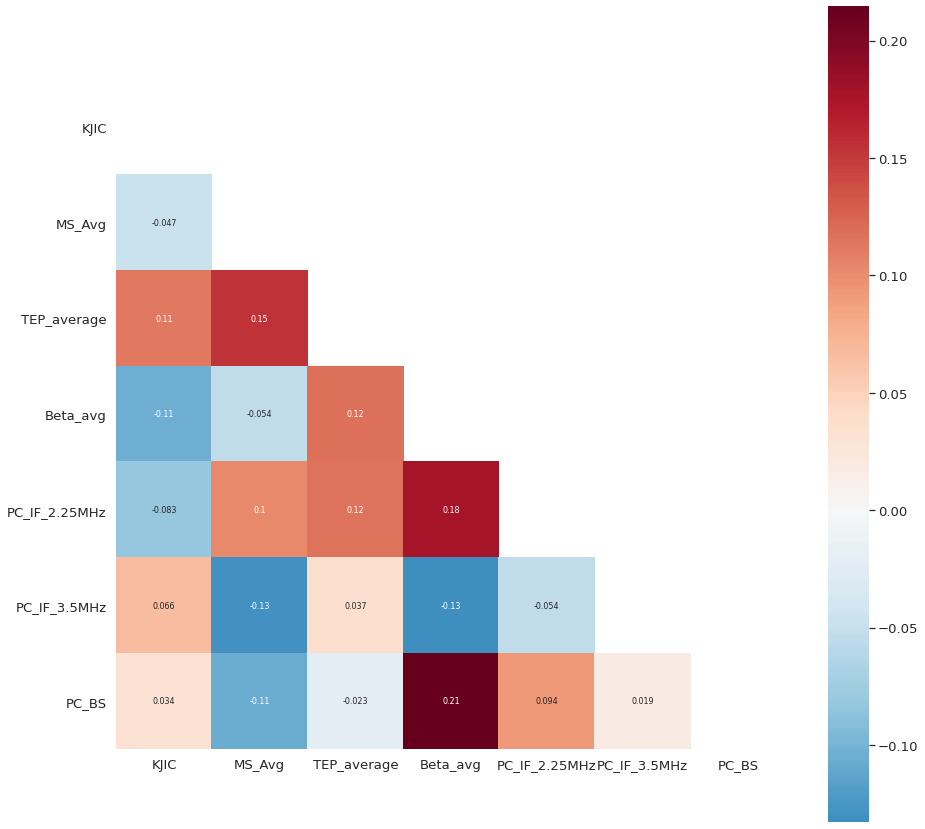

In [104]:
plot_corr(short_mean)

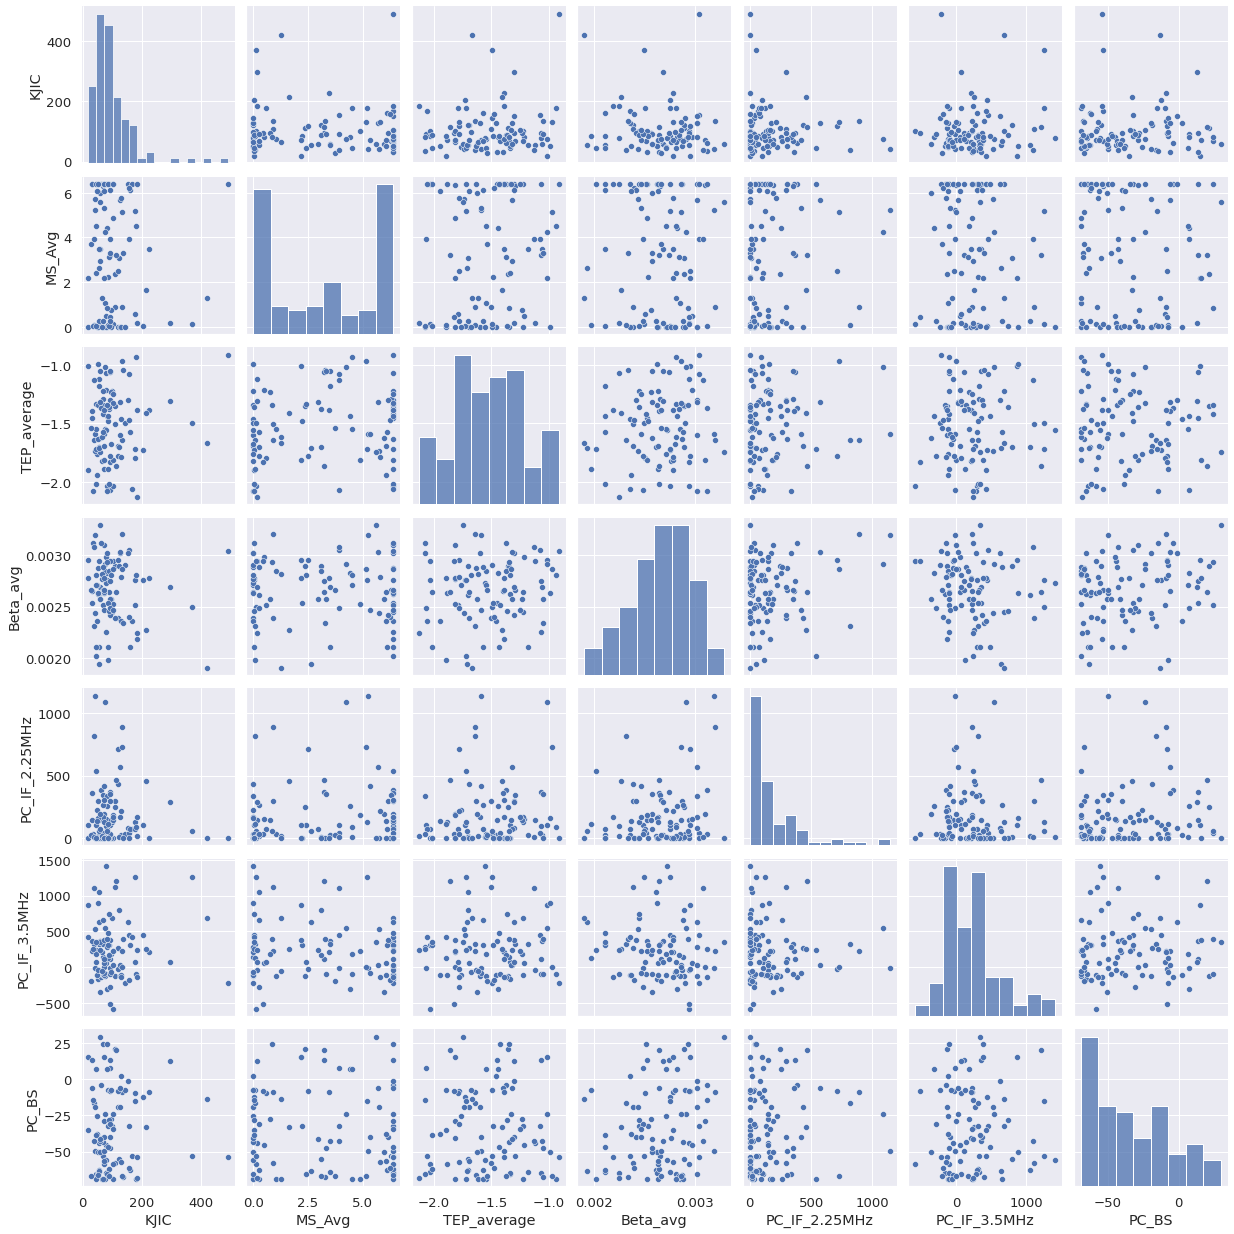

In [105]:
sns.pairplot(short_mean)

# 4. Save and load the synthesizer

To save a trained ctgan synthesizer, use

`ctgan.save(path_to_a_folder)`

To restore a saved synthesizer, use

`ctgan = CTGANSynthesizer()
ctgan.fit(data, discrete_columns, epochs=0, load_path=path_to_a_folder)`